In [44]:
import scipy.stats as stats
import pandas as pd
import os
import numpy as np

# Data viz:
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn stuff:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import wrangle as wrg
import env

In [4]:
sql_query = "select bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips from properties_2017 where propertylandusetypeid = 261"
directory = os.getcwd()
url_for_query = wrg.get_db_url("zillow")
filename = "zillow_2017.csv"

In [23]:
zillow_2017 = wrg.get_sql_data(sql_query, url_for_query, filename)

csv found and loaded


In [24]:
zillow_2017=wrg.wrangle_zillow(zillow_2017)

In [25]:
zillow_2017.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA


In [26]:
zillow_2017_dummies=pd.get_dummies(zillow_2017[["county"]], drop_first=True)

In [27]:
zillow_2017.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA


In [28]:
zillow_2017 = pd.concat([zillow_2017, zillow_2017_dummies], axis=1)

In [29]:
zillow_2017.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,county_Orange,county_Ventura
4,4,2.0,3633,296425,2005,6941.39,LA,0,0
6,3,4.0,1620,847770,2011,10244.94,LA,0,0
7,3,2.0,2077,646760,1926,7924.68,LA,0,0
11,0,0.0,1200,5328,1972,91.60,LA,0,0
14,0,0.0,171,6920,1973,255.17,LA,0,0


In [30]:
train_zillow, validate_zillow, test_zillow = wrg.split_function_cont_target(zillow_2017)

In [32]:
train_zillow.shape

(1219902, 9)

In [35]:
train_zillow = train_zillow[["area","taxvalue"]].copy()

In [36]:
model = LinearRegression().fit(train_zillow[["area"]], train_zillow.taxvalue)   
predictions = model.predict(train_zillow[["area"]])

In [37]:
train_zillow["yhat"] = predictions

In [39]:
def plot_residuals(y, yhat):
    residuals = yhat - y
    
    plt.scatter(x=y, y=residuals)
    plt.xlabel('Home Value')
    plt.ylabel('Residuals')
    plt.title('Residual vs Home Value Plot')
    plt.show()

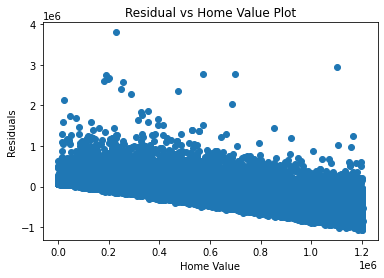

In [41]:
plot_residuals(train_zillow.taxvalue, train_zillow.yhat)

In [42]:
def regression_errors(y, yhat):
    MSE = mean_squared_error(y, yhat)
    SSE = MSE * len(y)
    RMSE = MSE**.5
    
    ESS = ((yhat - y.mean())**2).sum()
    TSS = ESS + SSE
    
    return SSE, ESS, TSS, MSE, RMSE

In [45]:
regression_errors(train_zillow.taxvalue, train_zillow.yhat)

(5.244624799783437e+16,
 1.9763181828771284e+16,
 7.220942982660565e+16,
 42992181337.3815,
 207345.56020658242)

In [46]:
def baseline_mean_errors(y):
    baseline = np.repeat(y.mean(), len(y))
    
    MSE = mean_squared_error(y, baseline)
    SSE = MSE * len(y)
    RMSE = MSE**.5
    
    return SSE, MSE, RMSE

In [47]:
baseline_mean_errors(train_zillow.taxvalue)

(7.220942982660589e+16, 59192812067.367615, 243295.7296529629)